## Comparing L1's by Mcap, TVL, and Weekly Active Sub-Ecosystem Devs.

### Background:

This was made to play with data pulled from the Artemis Sheets.

Here we used MC, TVL, and WASD as the sole metrics because other non-financial covered metrics weren't working.

The data is tracked from dates Feb 24th to Oct 23rd because any more and I'd hit my query limit.

The coins used for comparison are ETH, BNB, ADA, SOL, MATIC, AVAX, and NEAR, as they cover all the smart contract coins that were the Artemis Queries were working for MC, TVL, and WASD.

Obiously, much of what's here is made to extend to a larger number of metrics, dates, and coins.

### Goal
To find the correlation of TVL and Dev Activity to Market Cap, and if so, use that to find divergences within certain coins that'd make for a interesting investigation.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Pt 1: Cleaning

We just fill in some data and put into pandas dataframes.

In [2]:
# Putting into DF and cleaning empty rows/columns.

MC = pd.read_csv('MC.csv', index_col = [1], skiprows = 3, header = 1)
TVL = pd.read_csv('TVL.csv', index_col = [1], skiprows = 3, header = 1)
WASD = pd.read_csv('WASD.csv', index_col = [1], skiprows = 3, header = 1)

del (MC['Unnamed: 0'], TVL['Unnamed: 0'], WASD['Unnamed: 0'])

# Filling NANs

TVL.loc['2022-10-18', 'ATOM'] = float(475288.9)

TVL = TVL.astype(float)


### Pt. 2: Normalizing with Z_scores

Here we take cleaned data, and change the values into something more readable.

For example,

If ETH Mcap average is 2.5 billion, with a standard deviation of 0.5 billion, the new dataframe will show:
- 0 when Mcap is 2.5 billion
- 1 when Mcap is 3 billion
- -2 when Mcap is 1.5 billion

The same is done for every coin and every metric.

In [3]:
# Reset into a Normalized the DF via Z_score

for coin in MC:
    std = MC[coin].std()
    mean = MC[coin].mean()
    n = 0
    for val in MC[coin]:
        zScore = (val - mean) / std
        MC.loc[MC.index[n], coin] = zScore
        n += 1
        
for coin in TVL:
    std = TVL[coin].std()
    mean = TVL[coin].mean()
    n = 0
    for val in TVL[coin]:
        zScore = (val - mean) / std
        TVL.loc[TVL.index[n], coin] = zScore
        n += 1
        
for coin in WASD:
    std = WASD[coin].std()
    mean = WASD[coin].mean()
    n = 0
    for val in WASD[coin]:
        zScore = (val - mean) / std
        WASD.loc[WASD.index[n], coin] = zScore
        n += 1

Testing out the new Z_score, we can fill in the "project" variable with any coin to see it's data.

But the only insight is a steady downtrend of every coin and it's metrics since Febuary, so we gotta change to make it relative to eachother to see significant changes.

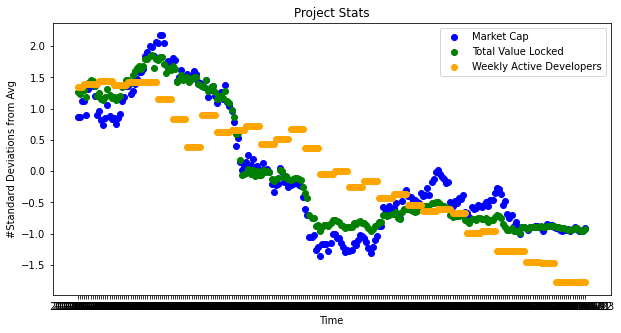

In [4]:
fig, ax = plt.subplots(figsize=(10,5))
project = 'ETH'

Date = MC.index
Coin = MC[project]
Tvl = TVL[project]
Wasd = WASD[project]

ax.scatter(Date, Coin, c='blue', label='Market Cap')
ax.scatter(Date, Tvl, c='green', label='Total Value Locked')
ax.scatter(Date, Wasd, c='orange', label='Weekly Active Developers')

ax.set_xlabel('Time')
ax.set_ylabel('#Standard Deviations from Avg')
ax.set_title('Project Stats')

plt.legend(loc = "best")

### Pt. 3: Compute Benchmark Metrics

Now we'll get the average of each, their relative correlations, and establish a benchmark for comparison.

In [5]:
avg_mc_score = MC.mean(axis=1)
avg_tvl_score = TVL.mean(axis=1)
avg_wasd_score = WASD.mean(axis=1)

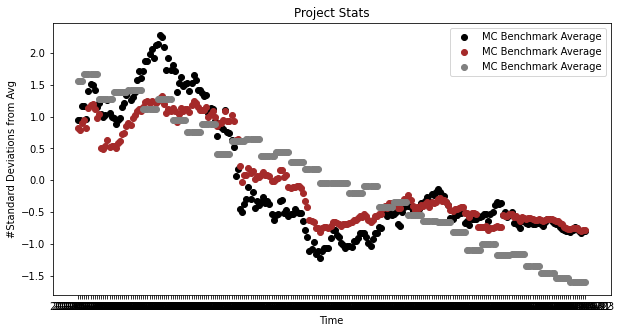

In [6]:
fig, ax = plt.subplots(figsize=(10,5))
project = 'ATOM'

Date = MC.index
Coin = MC[project]
Tvl = TVL[project]
Wasd = WASD[project]

# ax.scatter(Date, Coin, c='blue', label='Market Cap')
# ax.scatter(Date, Tvl, c='green', label='Total Value Locked')
# ax.scatter(Date, Wasd, c='orange', label='Weekly Active Developers')

ax.scatter(Date, avg_mc_score, c='black', label='MC Benchmark Average')
ax.scatter(Date, avg_tvl_score, c='brown', label='MC Benchmark Average')
ax.scatter(Date, avg_wasd_score, c='gray', label='MC Benchmark Average')

ax.set_xlabel('Time')
ax.set_ylabel('#Standard Deviations from Avg')
ax.set_title('Project Stats')

plt.legend(loc = "best")

##### Correlation Results

Tvl has a very strong correlation with Mcap (0.95) as you'd expect.

Active devs in sub-repos also has a strong correlation, a we'd hopefully expect.

Now we know they have potential predictive validity for price changes, should there be a big discrepancy.

In [7]:
print(np.corrcoef(avg_mc_score, avg_tvl_score)[1,0])
print(np.corrcoef(avg_mc_score, avg_wasd_score)[1,0])

0.954540221507825
0.7624941764779558


### Pt. 4: Normalizing Z_Score to the Category Average as a Function of Time


Now I gotta take the earlier dataframes, subtract each by the greater average day by day, thus making each metric of each coin a number that equals standard deviation from the Smart Contract category average.

In [8]:
for coin in MC:
    n = 0
    for val in MC[coin]:
        
        delta_MC = val - avg_mc_score[n]
        MC.loc[MC.index[n], coin] = delta_MC
        n +=1 

for coin in TVL:
    n = 0
    for val in TVL[coin]:
        
        delta_TVL = val - avg_tvl_score[n]
        TVL.loc[TVL.index[n], coin] = delta_TVL
        n += 1
        
for coin in WASD:
    n = 0
    for val in WASD[coin]:
    
        delta_WASD = val - avg_wasd_score[n]
        WASD.loc[WASD.index[n], coin] = delta_WASD
        n += 1

Sanity Check, the sum of all numbers should be zero because scores are made relative to eachother.

In [9]:
test = MC.mean(axis=1)

for val in test:
    if -0.001 < val < 0.001:
        True
    else:
        print('You fucked up')


### Pt. 5: Ploting and Deciphering

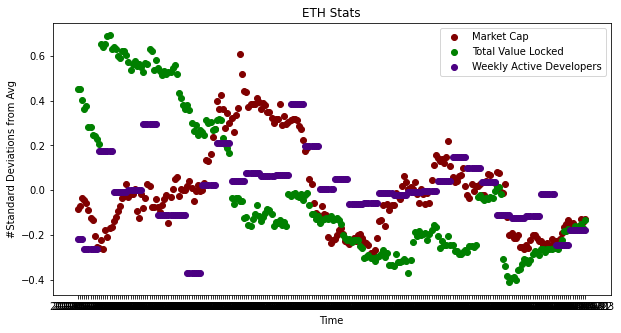

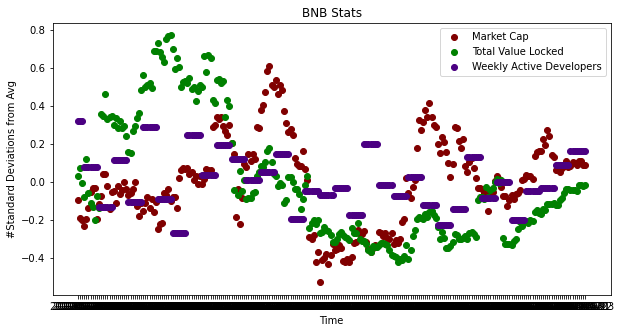

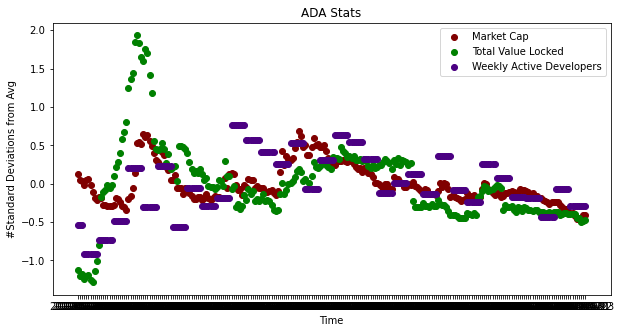

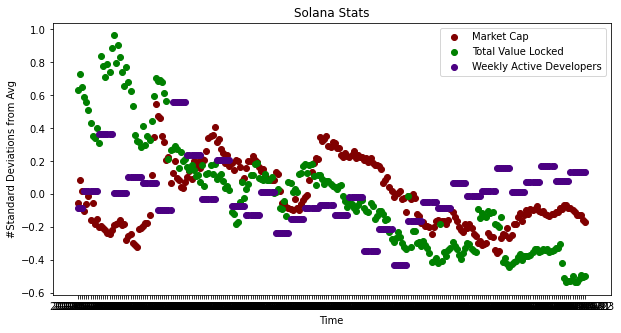

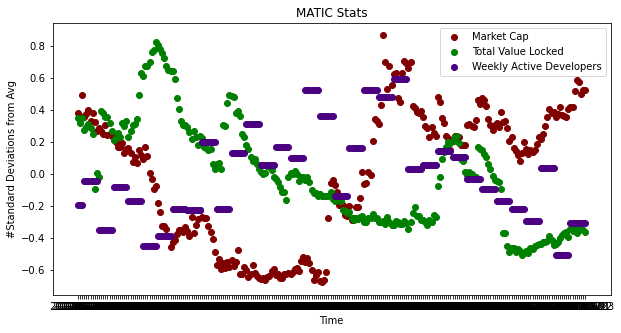

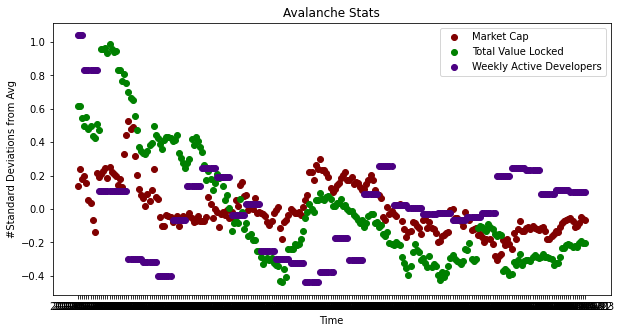

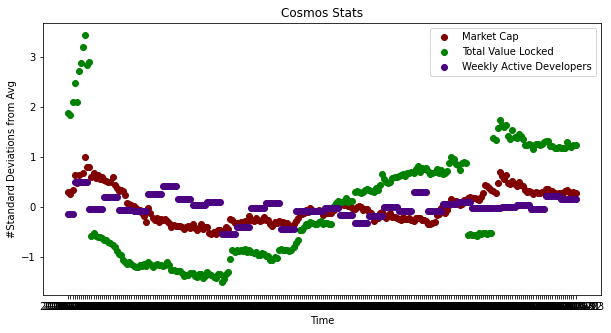

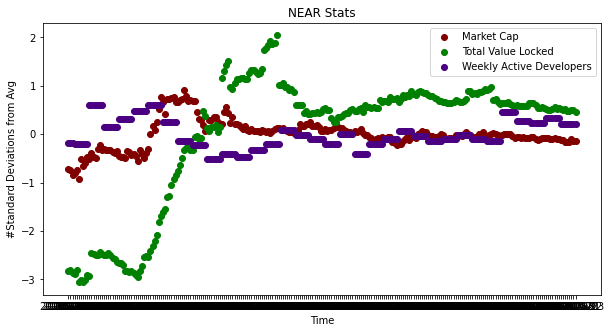

In [10]:
fig, ax = plt.subplots(figsize=(10,5))
project = 'ETH'

Date = MC.index
Coin = MC[project]
Tvl = TVL[project]
Wasd = WASD[project]

ax.scatter(Date, Coin, c='maroon', label='Market Cap')
ax.scatter(Date, Tvl, c='green', label='Total Value Locked')
ax.scatter(Date, Wasd, c='indigo', label='Weekly Active Developers')

ax.set_xlabel('Time')
ax.set_ylabel('#Standard Deviations from Avg')
ax.set_title('ETH Stats')

plt.legend(loc = "best")


#Now BNB

fig1, ax1 = plt.subplots(figsize=(10,5))
project = 'BNB'

Date = MC.index
Coin = MC[project]
Tvl = TVL[project]
Wasd = WASD[project]

ax1.scatter(Date, Coin, c='maroon', label='Market Cap')
ax1.scatter(Date, Tvl, c='green', label='Total Value Locked')
ax1.scatter(Date, Wasd, c='indigo', label='Weekly Active Developers')

ax1.set_xlabel('Time')
ax1.set_ylabel('#Standard Deviations from Avg')
ax1.set_title('BNB Stats')

plt.legend(loc = "best")

#Now ADA

fig2, ax2 = plt.subplots(figsize=(10,5))
project = 'ADA'

Date = MC.index
Coin = MC[project]
Tvl = TVL[project]
Wasd = WASD[project]

ax2.scatter(Date, Coin, c='maroon', label='Market Cap')
ax2.scatter(Date, Tvl, c='green', label='Total Value Locked')
ax2.scatter(Date, Wasd, c='indigo', label='Weekly Active Developers')

ax2.set_xlabel('Time')
ax2.set_ylabel('#Standard Deviations from Avg')
ax2.set_title('ADA Stats')

plt.legend(loc = "best")

#Now Solana
fig3, ax3 = plt.subplots(figsize=(10,5))
project = 'SOL'

Date = MC.index
Coin = MC[project]
Tvl = TVL[project]
Wasd = WASD[project]

ax3.scatter(Date, Coin, c='maroon', label='Market Cap')
ax3.scatter(Date, Tvl, c='green', label='Total Value Locked')
ax3.scatter(Date, Wasd, c='indigo', label='Weekly Active Developers')

ax3.set_xlabel('Time')
ax3.set_ylabel('#Standard Deviations from Avg')
ax3.set_title('Solana Stats')

plt.legend(loc = "best")

# Now MATIC
fig4, ax4 = plt.subplots(figsize=(10,5))
project = 'MATIC'

Date = MC.index
Coin = MC[project]
Tvl = TVL[project]
Wasd = WASD[project]

ax4.scatter(Date, Coin, c='maroon', label='Market Cap')
ax4.scatter(Date, Tvl, c='green', label='Total Value Locked')
ax4.scatter(Date, Wasd, c='indigo', label='Weekly Active Developers')

ax4.set_xlabel('Time')
ax4.set_ylabel('#Standard Deviations from Avg')
ax4.set_title('MATIC Stats')

# Now AVAX

plt.legend(loc = "best")

fig5, ax5 = plt.subplots(figsize=(10,5))
project = 'AVAX'

Date = MC.index
Coin = MC[project]
Tvl = TVL[project]
Wasd = WASD[project]

ax5.scatter(Date, Coin, c='maroon', label='Market Cap')
ax5.scatter(Date, Tvl, c='green', label='Total Value Locked')
ax5.scatter(Date, Wasd, c='indigo', label='Weekly Active Developers')

ax5.set_xlabel('Time')
ax5.set_ylabel('#Standard Deviations from Avg')
ax5.set_title('Avalanche Stats')

plt.legend(loc = "best")

# Now Cosmos

plt.legend(loc = "best")

fig6, ax6 = plt.subplots(figsize=(10,5))
project = 'ATOM'

Date = MC.index
Coin = MC[project]
Tvl = TVL[project]
Wasd = WASD[project]

ax6.scatter(Date, Coin, c='maroon', label='Market Cap')
ax6.scatter(Date, Tvl, c='green', label='Total Value Locked')
ax6.scatter(Date, Wasd, c='indigo', label='Weekly Active Developers')

ax6.set_xlabel('Time')
ax6.set_ylabel('#Standard Deviations from Avg')
ax6.set_title('Cosmos Stats')

plt.legend(loc = "best")

# Now Near

plt.legend(loc = "best")

fig6, ax6 = plt.subplots(figsize=(10,5))
project = 'NEAR'

Date = MC.index
Coin = MC[project]
Tvl = TVL[project]
Wasd = WASD[project]

ax6.scatter(Date, Coin, c='maroon', label='Market Cap')
ax6.scatter(Date, Tvl, c='green', label='Total Value Locked')
ax6.scatter(Date, Wasd, c='indigo', label='Weekly Active Developers')

ax6.set_xlabel('Time')
ax6.set_ylabel('#Standard Deviations from Avg')
ax6.set_title('NEAR Stats')

plt.legend(loc = "best")

### Findings

- ETH, BNB, ADA, and AVAX appear properly valued, as their metrics move together as expected.
- Solana TVL dropped dramatically compared to the others over the last few months, but developer activity grew slightly. Marketcap remained consistent with the market average.
- Matic appears to be overvalued given a recent and steep rise in market cap while TVL and Dev Actvity steadily declined relative to others. This warrents further investigation.
- Cosmos is stead yas the come, but recent TVL growth is something to keep an eye on.
- Near is potentially undervalued, as TVL and Dev Activity have shown growth while Mcap gradually declines. This warrents further investigation.


### Next Steps

All of those lines should be Moving averages instead of scatters. It'd make more sense to do this going back years, not weeks, so getting passed the query limit would make this upgrade worth it.

Using this methodology though, if all coins metrics were to be added, this could be used to create a Fundamental Crypto Asset Score. Let me explain.

With such a dataset, each category (Smart Contracts, Dexs, Gaming, etc.) could be compared against one another. Each metric would have some predictive validity of marketcap in a given domain. I'd be able to mush those metrics together, scoring each cryptoasset either within a category or within the whole. Along the way, each discrepancy the market hasn't picked up on is an opportunity for an Artemis Research piece where the data visualization meets some real-world story that's waiting to be dug up the old fashioned way.